# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [ ]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need to save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take effect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [ ]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [23]:
def remove_punctuation(s, punctuations):
    """takes a string and removes punctuation
    marks which occur at the end of a word within
    the string

    Args:
        s (string): string to remove punctuations from
        punctuations (string): a string containing all punctuation marks
        with no white space between them

    Returns:
        string: same as s but with punctuation marks removed
    """
    punctuations_list = [*punctuations]
    # print(punctuations_list)        
    new_s = []
    for word in s.split(): 
        last_char = word[len(word) - 1]
        second_last_char = word[len(word) - 2]
        
        # word doesn't contain punctuation marks
        if (last_char not in punctuations_list and
            second_last_char not in punctuations_list):
            new_s.append(word)
            
        else: 
            # remove punctuation marks if they 
            # occur at the end of a word
            while last_char in punctuations_list:
                word = word[0: len(word) - 1]
                try:
                    last_char = word[len(word) - 1]
                except:
                    last_char = """We are returning an empty string. 
                                    This string is never looked at"""
            # if last char is alphabetical but second 
            # to last char is a punctuation mark
            if second_last_char in punctuations_list:
                # remove last two characters 
                # (here's -> here)
                word = word[0: len(word) - 2] 
            new_s.append(word)

    return " ".join(new_s)




punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

print("====== remove_punctuation =============")
print("should be 'hello': {result}".format(result = remove_punctuation("hello", punctuations)))
print("should be 'hello': {}".format(remove_punctuation("hello...", punctuations))) 
print("should be 'hello bob': {}".format(remove_punctuation("hello, bob", punctuations))) 
print("should be 'hello here bob coming': {}".format(remove_punctuation("hello, here's bob coming", punctuations))) 
print("should be '': {}".format(remove_punctuation("...", punctuations))) 


def remove_non_alphabetical(sentence):
    """takes a string and removes any words that contain non-alphabetical characters

    Args:
        sentence (string): contains any number of words
    Returns:
        string: same as s but with words containing non-alphabetical 
        characters removed
    """
    new_sentence = []
    for word in sentence.split(" "):
        if word.isalpha():
            new_sentence.append(word)
    return " ".join(new_sentence)

print("=====remove_non_alphabetical =====")
print("should be '': " + remove_non_alphabetical(""))
print("should be 'hello': " + remove_non_alphabetical("hello"))
print("should be '': " + remove_non_alphabetical("hello()"))
print("should be '': " + remove_non_alphabetical("hel0lo"))
print("should be 'there my name mohammed': " + remove_non_alphabetical("hello] there my name 3 mohammed"))


def remove_boring_words(sentence, boring_words):
    """returns the given string with any occurences of boring_words removed

    Args:
        sentence (string): contains any number of words
        boring_words (string list): ["the", "and"] etc.
    Returns:
        string: same as s but with boring words removed
    """
    new_s = []
    for word in sentence.split(" "):
        if word not in boring_words:
            new_s.append(word)
    return " ".join(new_s)

print("====== remove_boring_words ==========")
uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
print("should be '': " + remove_boring_words("", uninteresting_words))
print("should be 'hello': " + remove_boring_words("hello", uninteresting_words))
print("should be 'hello thera': " + remove_boring_words("such hello which is thera me my", uninteresting_words))

should be 'hello': hello
should be 'hello': hel
should be 'hello bob': hello bob
should be 'hello here bob coming': hello here bob coming
should be '': 
=====remove_non_alphabetical =====
should be '': 
should be 'hello': hello
should be '': 
should be '': 
should be 'there my name mohammed': there my name mohammed
====== remove_boring_words ==========
should be '': 
should be 'hello': hello
should be 'hello thera': hello thera


In [25]:



def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE

    # make it case-insensitive
    file_contents = file_contents.lower()
    # disregard punctuation marks
    file_contents = remove_punctuation(file_contents, punctuations)
    # exclude odd words containing non-alphabetical characters
    file_contents = remove_non_alphabetical(file_contents)
    # exclude boring words
    file_contents = remove_boring_words(file_contents, uninteresting_words)
    print
    words_count = {}
    for word in file_contents.split():
        if word in words_count:
            # increment by one
            words_count[word]+=1
        else:
            # add new word 
            words_count[word] = 1
    # return words_count    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(words_count)
    return cloud.to_array()

# tests work when the function returns a dictionary

# assert calculate_frequencies("") == {}
# assert calculate_frequencies("hello") == {"hello": 1}
# assert calculate_frequencies("hello hello,") == {"hello": 2}
# assert calculate_frequencies("hello HEllo") == {"hello": 2}
# assert calculate_frequencies("hello hi hello,") == {"hello": 2, "hi": 1}
# assert calculate_frequencies("1hello") == {}
# assert calculate_frequencies("hello]") == {"hello": 1}
# assert calculate_frequencies("he!llo") == {}
# assert calculate_frequencies("bob bob's") == {"bob": 2}

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

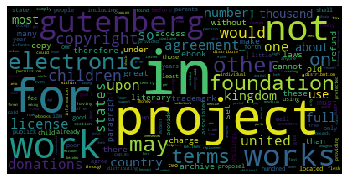

In [26]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequency count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!